# Dammann Gratings

In [2]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

from matplotlib import pyplot as plt 
import numpy as np 

from scipy.constants import micro, nano, milli

import pyMOE as moe 
from pyMOE.generate import *  

from scipy import ndimage

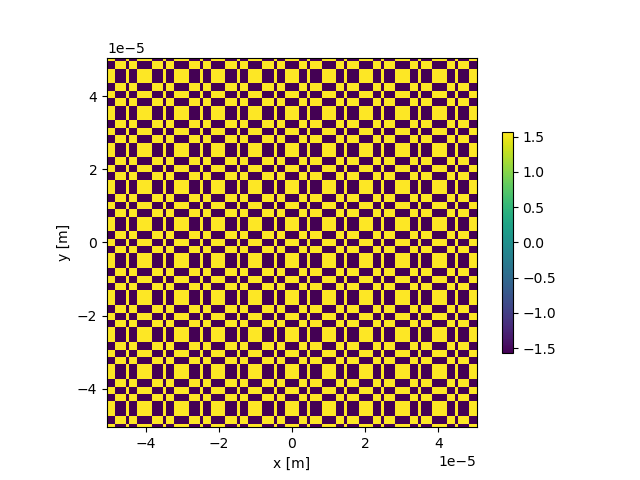

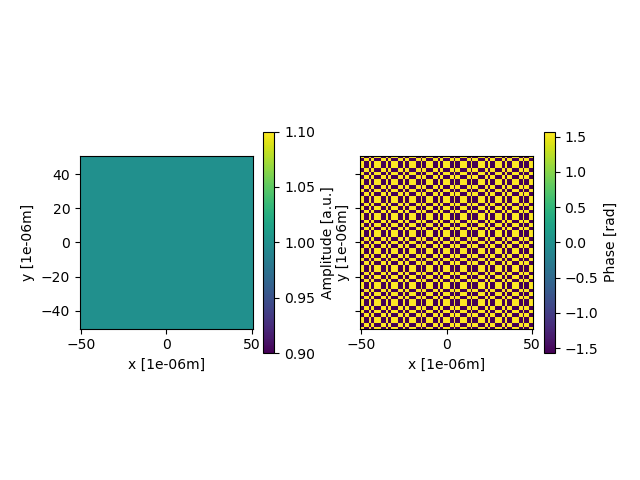

In [9]:



# Generates and propagates a Dammann grating phase 

aperture_width = 100*micro
aperture_height = 100*micro
x_pixel = 100
y_pixel = 100

aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)


transitions_x = [0.2, 0.45]
transitions_y = [0.1, 0.3]


period_x = period_y = 10*micro

# mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.dammann_2d, L=L)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.dammann_2d, transitions_x=transitions_x, period_x=period_x, transitions_y=transitions_y, period_y=period_y)

mask.aperture = mask.aperture*np.pi/2
# # Set 16 phase levels to discretize the fresnel mask
# phase_values = np.linspace(0, np.pi, 2)
# mask.discretize(phase_values)

moe.plotting.plot_aperture(mask)





field = moe.field.create_empty_field_from_aperture(mask)
field = moe.field.generate_uniform_field(field, E0=1)
# field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=None)
field = moe.field.modulate_field(field, amplitude_mask=None, phase_mask=mask)


moe.plotting.plot_field(field, scale=micro)




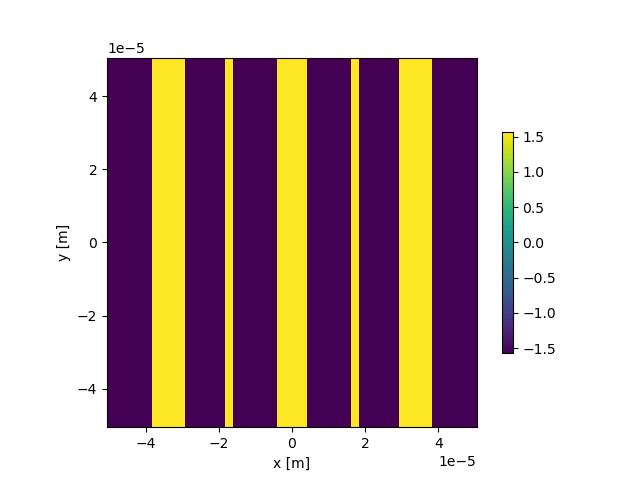

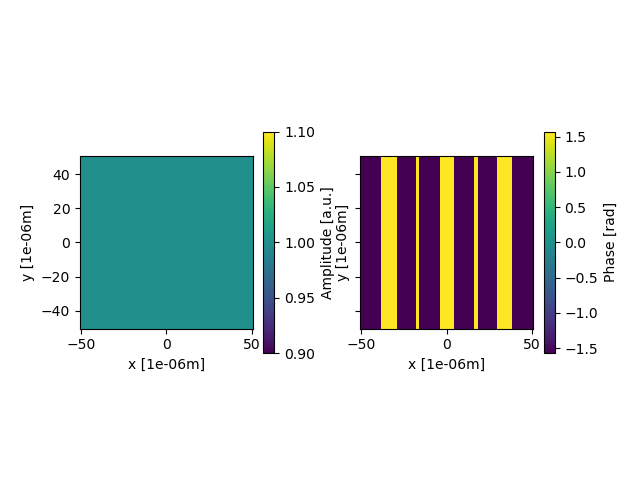

In [ ]:



# Generates and propagates a Dammann grating phase 

aperture_width = 100*micro
aperture_height = 100*micro
x_pixel = 100
y_pixel = 100

aperture = moe.generate.create_empty_aperture(-aperture_width/2, aperture_width/2, x_pixel, -aperture_height/2, aperture_height/2, y_pixel,)


transitions_x = [0.132, 0.48]
transitions_y = [0.1, 0.3]
transitions_y = None

period_x = period_y = 34.2*micro

# mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.dammann_2d, L=L)
mask =  moe.generate.arbitrary_aperture_function(aperture, moe.sag.dammann_2d, transitions_x=transitions_x, period_x=period_x, transitions_y=transitions_y, period_y=period_y)

mask.aperture = mask.aperture*np.pi/2
# # Set 16 phase levels to discretize the fresnel mask
# phase_values = np.linspace(0, np.pi, 2)
# mask.discretize(phase_values)

moe.plotting.plot_aperture(mask)





field = moe.field.create_empty_field_from_aperture(mask)
field = moe.field.generate_uniform_field(field, E0=1)
# field = moe.field.modulate_field(field, amplitude_mask=mask, phase_mask=None)
field = moe.field.modulate_field(field, amplitude_mask=None, phase_mask=mask)


moe.plotting.plot_field(field, scale=micro)




[########################################] | 100% Completed | 12.61 s


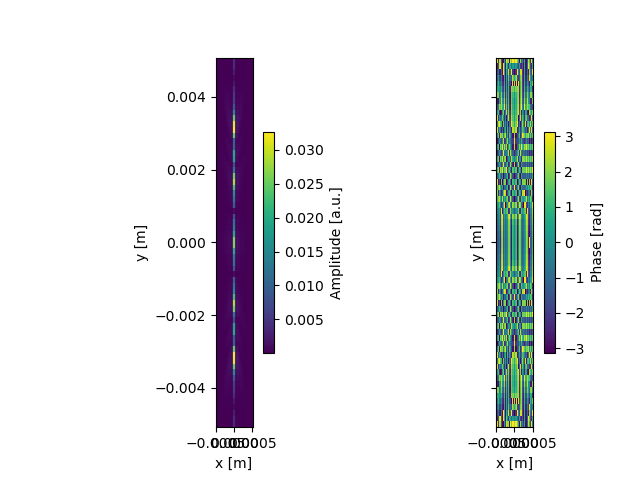

In [7]:

# define the wavelength used in the propagation
wavelength = 1550*nano

# Define the screen size and create it
screen_width = 1000*micro
screen_height = 10000*micro
x_pixel = 64
y_pixel = 64

screen_XY = moe.field.create_screen_XY(-screen_width/2, screen_width/2, x_pixel,
                                     -screen_height/2, screen_height/2, y_pixel, 
                                     z=3500*micro)

screen_XY = moe.propagate.RS_integral(field, screen_XY, wavelength)

moe.plotting.plot_screen_XY(screen_XY)